In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
transfer_stats_df = pd.read_csv('transfer_stats.csv', index_col=0)
transfers_in = pd.read_csv('transfers_in_clean.csv', index_col=0)

In [3]:
transfer_stats_df.head()

,club_api_id,club_name,year,league_name,average_age,total_spent,nTransfers,Fifteen_TwentyTwo,TwentyThree_TwentyNine,Thirty_Plus,...,Midfielder,league_position,position_value,win_pct,goals_for,goals_against,goal_difference,three_year_spending,two_year_spending,pos_val_pct_change
0,6403,FC Paços de Ferreira,2008,Liga Nos,24.962798,0.005456,23,0.000596,0.004860,0.0,...,0.001811,10.0,55.0,0.300000,37.0,42.0,-5.0,NaN,NaN,NaN
1,6403,FC Paços de Ferreira,2009,Liga Nos,22.744444,0.004837,27,0.001192,0.003645,0.0,...,0.001215,9.0,60.0,0.266667,32.0,37.0,-5.0,NaN,0.010293,9.090909
2,6403,FC Paços de Ferreira,2010,Liga Nos,23.708333,0.060811,19,0.059596,0.001215,0.0,...,0.000000,7.0,70.0,0.333333,35.0,42.0,-7.0,0.071104,0.065648,16.666667
3,6403,FC Paços de Ferreira,2011,Liga Nos,23.792007,0.014558,35,0.001192,0.013366,0.0,...,0.002430,10.0,55.0,0.266667,35.0,53.0,-18.0,0.080206,0.075369,-21.428571
4,6403,FC Paços de Ferreira,2012,Liga Nos,22.206349,0.004814,26,0.002384,0.002430,0.0,...,0.001788,3.0,90.0,0.466667,42.0,29.0,13.0,0.080182,0.019371,63.636364


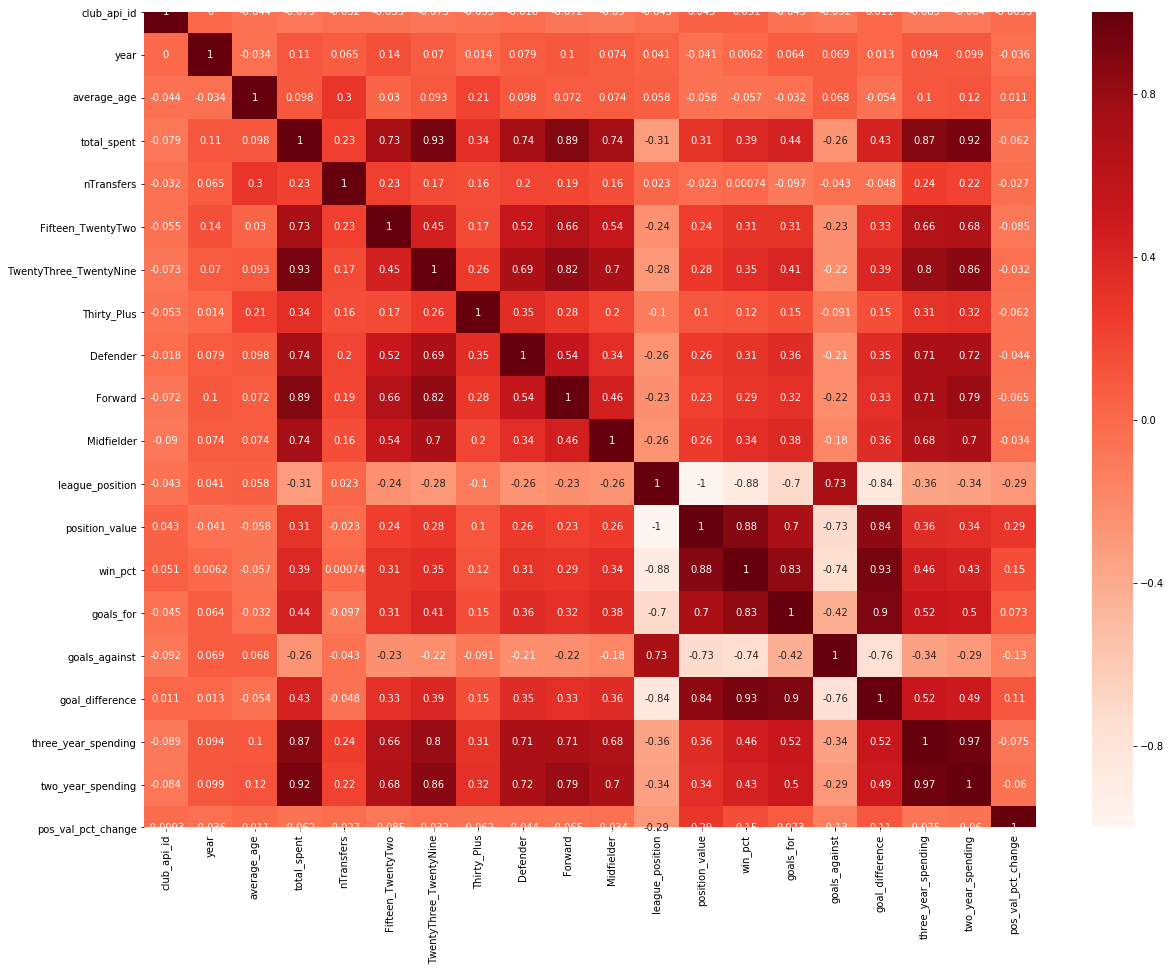

In [4]:
_ = plt.figure(figsize=(20,15))
corr = transfer_stats_df.corr()
_ = sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

In [5]:
from statsmodels.formula.api import ols

In [6]:
m = ols('position_value~Forward+Midfielder+Defender', transfer_stats_df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         position_value   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     17.94
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           4.76e-11
Time:                        18:18:37   Log-Likelihood:                -2127.4
No. Observations:                 480   AIC:                             4263.
Df Residuals:                     476   BIC:                             4279.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.0875      1.215     56.061      0.0

In [7]:
m = ols('position_value~Fifteen_TwentyTwo+TwentyThree_TwentyNine+Thirty_Plus', transfer_stats_df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:         position_value   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     16.40
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           3.70e-10
Time:                        18:18:45   Log-Likelihood:                -2129.5
No. Observations:                 480   AIC:                             4267.
Df Residuals:                     476   BIC:                             4284.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 68

In [8]:
m = ols('goal_difference~Fifteen_TwentyTwo+TwentyThree_TwentyNine+Thirty_Plus', transfer_stats_df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:        goal_difference   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     36.00
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           5.54e-21
Time:                        18:18:52   Log-Likelihood:                -2166.6
No. Observations:                 480   AIC:                             4341.
Df Residuals:                     476   BIC:                             4358.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7

In [9]:
m = ols('goal_difference~Forward+Midfielder+Defender+average_age', transfer_stats_df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:        goal_difference   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     30.65
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.04e-22
Time:                        18:18:54   Log-Likelihood:                -2160.6
No. Observations:                 480   AIC:                             4331.
Df Residuals:                     475   BIC:                             4352.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      54.7375     19.222      2.848      

In [10]:
m = ols('goal_difference~two_year_spending', transfer_stats_df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:        goal_difference   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     129.7
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           2.33e-26
Time:                        18:18:56   Log-Likelihood:                -1893.1
No. Observations:                 420   AIC:                             3790.
Df Residuals:                     418   BIC:                             3798.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.8534      1.42

In [11]:
m = ols('goal_difference~three_year_spending', transfer_stats_df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:        goal_difference   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.13e-26
Time:                        18:18:57   Log-Likelihood:                -1614.2
No. Observations:                 360   AIC:                             3232.
Df Residuals:                     358   BIC:                             3240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.2583    

In [12]:
avg_transfer_stats = transfer_stats_df.groupby(['club_api_id','club_name','league_name']).mean().sort_values('position_value', ascending=False)
avg_transfer_stats.reset_index(level=2, inplace=True)
avg_transfer_stats.head()

,,league_name,year,average_age,total_spent,nTransfers,Fifteen_TwentyTwo,TwentyThree_TwentyNine,Thirty_Plus,Defender,Forward,Midfielder,league_position,position_value,win_pct,goals_for,goals_against,goal_difference,three_year_spending,two_year_spending,pos_val_pct_change
club_api_id,club_name,,,,,,,,,,,,,,,,,,,,
8634,FC Barcelona,Primera Division,2011.5,23.613790,78.066250,9.750,23.366250,51.100000,3.6000,20.868750,41.222500,15.975000,1.250,98.750,0.769737,106.125,29.000,77.125,226.131667,159.537143,0.075188
9823,Bayern Munich,1 Bundesliga,2011.5,23.565972,47.193750,9.125,13.511250,31.095000,2.5875,13.511250,13.826250,19.856250,1.500,97.500,0.709559,81.625,26.375,55.250,142.710000,96.428571,0.868839
9772,SL Benfica,Liga Nos,2011.5,23.785597,32.975366,39.125,17.203000,15.637366,0.1350,7.473125,14.743558,10.758683,1.625,96.875,0.743382,71.000,23.250,47.750,102.549798,67.482980,1.624896
8593,Ajax Amsterdam,Eredivisie,2011.5,23.759735,11.630458,14.125,6.380083,4.800375,0.4500,3.199104,2.894125,5.537229,1.625,96.875,0.665441,80.875,29.500,51.375,28.800056,20.602786,0.831245
9773,FC Porto,Liga Nos,2011.5,24.578261,32.920729,35.625,19.113229,13.695000,0.1125,8.340625,8.445000,16.135104,1.875,95.625,0.738971,67.625,20.125,47.500,95.629445,65.288750,-1.228070


In [13]:
avg_m = ols('goal_difference~Forward+Midfielder+Defender+average_age+Fifteen_TwentyTwo+TwentyThree_TwentyNine+Thirty_Plus', avg_transfer_stats).fit()
print(avg_m.summary())

                            OLS Regression Results                            
Dep. Variable:        goal_difference   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     9.425
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           4.92e-07
Time:                        18:19:02   Log-Likelihood:                -244.37
No. Observations:                  60   AIC:                             502.7
Df Residuals:                      53   BIC:                             517.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                155